In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
train_image_files_path="/content/drive/MyDrive/BTL_AI/BTL_AI/DATA/Train"
valid_image_files_path="/content/drive/MyDrive/BTL_AI/BTL_AI/DATA/Validation"

In [ ]:
label=['Bike','Bus','Car','Motorbike','Truck']

In [ ]:
#Chuẩn hóa ảnh về 0:1: rescale
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
#Doc 2 du lieu train, validation va gan nhan
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(50,50),
    batch_size=32,
    class_mode='categorical')
validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(50,50),
    batch_size=32,
    class_mode='categorical')

Found 317 images belonging to 5 classes.
Found 399 images belonging to 5 classes.


In [ ]:
#Xây dựng mô hình
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
model = tf.keras.models.Sequential()

#Lowps CNN1
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPooling2D(2,2))

#Lowps CNN2
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

#Lowps CNN3
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

#Lowps CNN4
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

#Chuyen du lieu dau ra cua mang CNN tu mang 2 chieu ve mang 1 chieu
model.add(Flatten())

#Lop an
model.add(Dense(512, activation=tf.nn.relu))

#Lop output
model.add(Dense(5, activation=tf.nn.softmax)) #5 dau ra


In [ ]:
#Thiet lap tham so de huan luyen mo hinh
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
EPOCHS = 200
history=model.fit(
    train_generator,
    steps_per_epoch=2,
    epochs=EPOCHS,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=2)

Epoch 1/200
2/2 [==============================] - 34s 28s/step - loss: 1.5759 - acc: 0.2787 - val_loss: 2.0317 - val_acc: 0.1875
Epoch 2/200
2/2 [==============================] - 25s 22s/step - loss: 1.8055 - acc: 0.1719 - val_loss: 1.6019 - val_acc: 0.1875
Epoch 3/200
2/2 [==============================] - 16s 15s/step - loss: 1.5983 - acc: 0.1406 - val_loss: 1.6105 - val_acc: 0.2031
Epoch 4/200
2/2 [==============================] - 15s 13s/step - loss: 1.5953 - acc: 0.1250 - val_loss: 1.5988 - val_acc: 0.1875
Epoch 5/200
2/2 [==============================] - 10s 9s/step - loss: 1.6102 - acc: 0.2031 - val_loss: 1.5870 - val_acc: 0.1875
Epoch 6/200
2/2 [==============================] - 9s 8s/step - loss: 1.6094 - acc: 0.2459 - val_loss: 1.5863 - val_acc: 0.2344
Epoch 7/200
2/2 [==============================] - 8s 8s/step - loss: 1.5916 - acc: 0.2623 - val_loss: 1.5929 - val_acc: 0.2344
Epoch 8/200
2/2 [==============================] - 8s 7s/step - loss: 1.5932 - acc: 0.2188 - va

Saving 4-5-1.jpg to 4-5-1.jpg
Saving 4-thuong-hieu-xe-dap-chat-luong-den-tu-viet-nam-hbv1-730x500.jpg to 4-thuong-hieu-xe-dap-chat-luong-den-tu-viet-nam-hbv1-730x500.jpg
Saving 5f7a2ee2-94e6-46d5-bc7f-b3a12e544c08-jpeg.jpg to 5f7a2ee2-94e6-46d5-bc7f-b3a12e544c08-jpeg.jpg
Saving 61zvgey-k-plus-l-ac-sl1200-1.jpg to 61zvgey-k-plus-l-ac-sl1200-1.jpg
Saving 418_Xe-dap-the-thao-nu-GIANT-MOMENTUM-INEED-1500.jpg to 418_Xe-dap-the-thao-nu-GIANT-MOMENTUM-INEED-1500.jpg
Saving 2023-meme-1-trang-bike2shool.jpg to 2023-meme-1-trang-bike2shool.jpg
Saving 2345.jpg to 2345.jpg


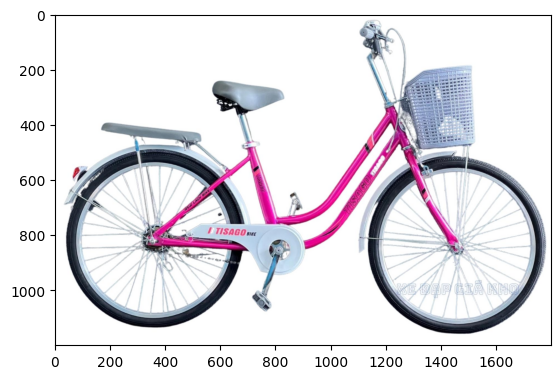

1/1 [==============================] - 0s 205ms/step
[[1.0000000e+00 1.2850086e-10 2.1453015e-09 2.1762068e-09 4.6745056e-12]]
Giá trị dự đoán:  Bike


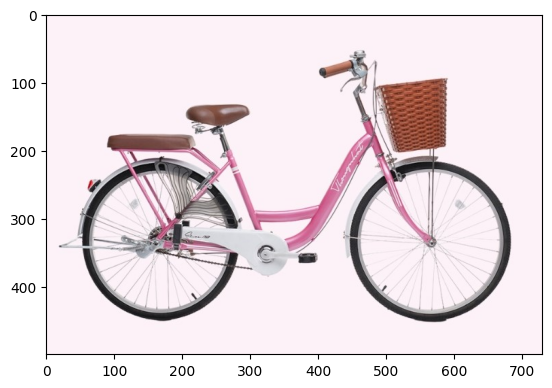

1/1 [==============================] - 0s 25ms/step
[[1.0000000e+00 9.4993804e-11 2.0848185e-08 1.4120047e-08 6.2388558e-12]]
Giá trị dự đoán:  Bike


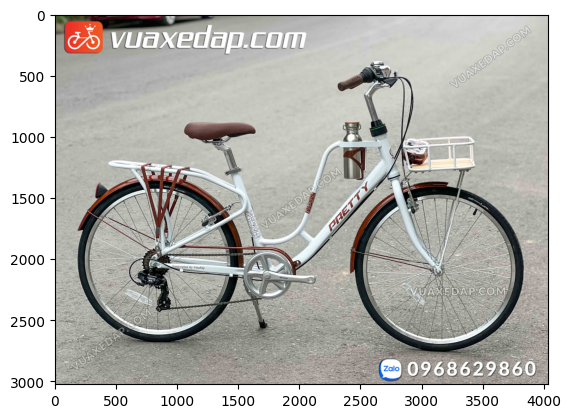

1/1 [==============================] - 0s 23ms/step
[[9.9999976e-01 3.3352140e-10 7.2542007e-11 2.2045145e-07 8.5712704e-12]]
Giá trị dự đoán:  Bike


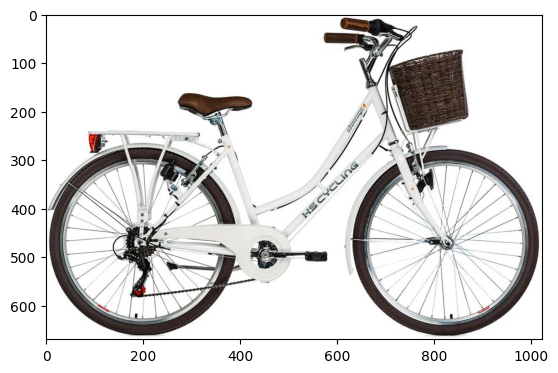

1/1 [==============================] - 0s 33ms/step
[[1.0000000e+00 1.6504102e-12 1.6481509e-09 9.0893716e-11 1.4806248e-14]]
Giá trị dự đoán:  Bike


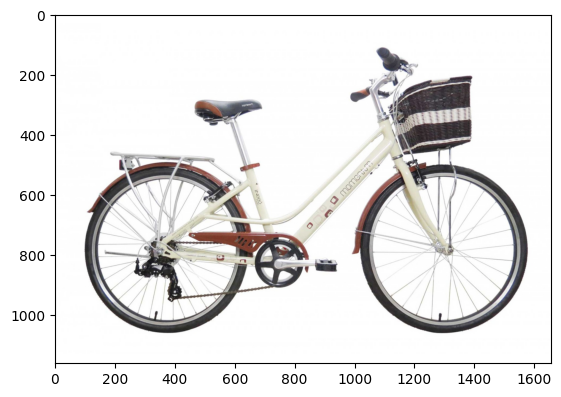

1/1 [==============================] - 0s 23ms/step
[[9.9999881e-01 1.3527340e-09 1.1916005e-06 5.6052297e-08 1.4049704e-11]]
Giá trị dự đoán:  Bike


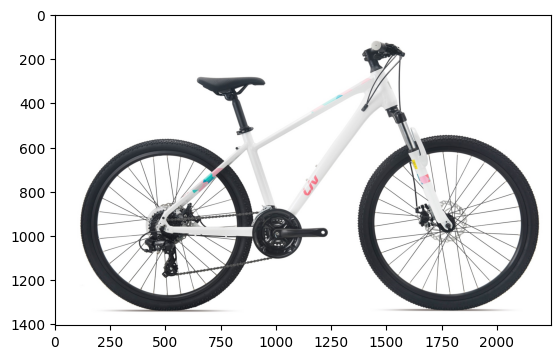

1/1 [==============================] - 0s 23ms/step
[[1.0000000e+00 2.2031928e-11 7.8248644e-11 1.1162699e-08 1.5214814e-13]]
Giá trị dự đoán:  Bike


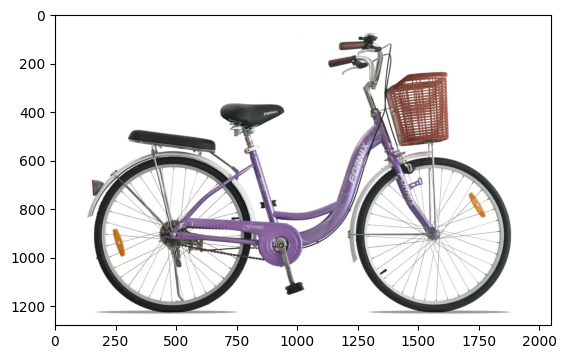

1/1 [==============================] - 0s 23ms/step
[[1.0000000e+00 3.0024003e-13 7.5375487e-12 1.3290736e-09 9.1293846e-15]]
Giá trị dự đoán:  Bike


In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Upload the image file
anh_upload = files.upload()

for anh in anh_upload.keys():
    # Đường dẫn tới tệp ảnh đã tải lên
    path = '/content/' + anh

    # Hiển thị ảnh đã tải lên
    plt.imshow(mpimg.imread(path))
    plt.show()

    # Tải ảnh với kích thước mục tiêu (50, 50)
    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Chuẩn hóa ảnh (nếu mô hình của bạn yêu cầu chuẩn hóa)

    # Dự đoán
    images = np.vstack([x])
    y_pred = model.predict(images, batch_size=10)

    # Hiển thị kết quả dự đoán
    print(y_pred)
    print('Giá trị dự đoán: ', label[np.argmax(y_pred)])

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Độ chính xác: {accuracy}')

13/13 [==============================] - 8s 595ms/step - loss: 0.2440 - acc: 0.9398
Độ chính xác: 0.9398496150970459


In [ ]:
def custom_loss_function(y_true, y_pred):
    loss = tf.reduce_mean(tf.square(y_true - y_pred))
    return loss

model.compile(optimizer='adam', loss=custom_loss_function, metrics=['accuracy'])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Dự đoán trên tập kiểm tra
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Báo cáo phân loại
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=label))

# Ma trận nhầm lẫn
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))


13/13 [==============================] - 8s 646ms/step
Classification Report
              precision    recall  f1-score   support

        Bike       0.18      0.18      0.18        85
         Bus       0.14      0.14      0.14        70
         Car       0.17      0.16      0.16        76
   Motorbike       0.18      0.18      0.18        74
       Truck       0.21      0.22      0.22        94

    accuracy                           0.18       399
   macro avg       0.18      0.18      0.18       399
weighted avg       0.18      0.18      0.18       399

Confusion Matrix
[[15 18 17 14 21]
 [10 10 12 17 21]
 [17 13 12 14 20]
 [18 11 16 13 16]
 [25 19 13 16 21]]


In [ ]:
import time
# Tính thời gian huấn luyện
start_time = time.time()

history = model.fit(
train_generator,
epochs=20,
validation_data=validation_generator
)

end_time = time.time()
training_time = end_time - start_time
print(f'Thời gian huấn luyện: {training_time:.2f} giây')

Epoch 1/20
 4/10 [===========>..................] - ETA: 3s - loss: 0.0040 - accuracy: 0.9840    

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 [==============================] - 19s 2s/step - loss: 0.0044 - accuracy: 0.9842 - val_loss: 0.0272 - val_accuracy: 0.9198
Epoch 2/20
10/10 [==============================] - 17s 2s/step - loss: 0.0051 - accuracy: 0.9811 - val_loss: 0.0205 - val_accuracy: 0.9373
Epoch 3/20
10/10 [==============================] - 16s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 0.9449
Epoch 4/20
10/10 [==============================] - 15s 2s/step - loss: 4.7861e-04 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 0.9323
Epoch 5/20
10/10 [==============================] - 16s 2s/step - loss: 4.5019e-04 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9273
Epoch 6/20
10/10 [==============================] - 16s 2s/step - loss: 5.2398e-04 - accuracy: 1.0000 - val_loss: 0.0158 - val_accuracy: 0.9474
Epoch 7/20
10/10 [==============================] - 16s 2s/step - loss: 0.0022 - accuracy: 0.9905 - val_loss: 0.0191 - val_accuracy: 0.9373
Epoch 8/20
10/10 [=